# 01. Import libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
# Create a path for easier importing
path = r'C:\Users\blim9\Desktop\Career Foundry\Data Immersion\Achievement 4\Instacart Basket Analysis 2022-09-09'

In [3]:
# Import the last file from Task 1
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_final.pkl'))

In [9]:
ords_prods_cust.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,new_customer,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,False,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


# 02. Bar Chart

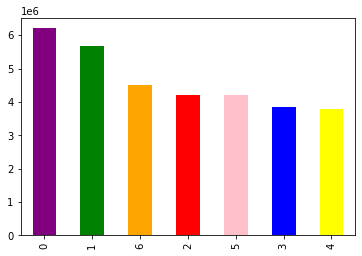

In [11]:
# Create a bar chart for the order_day_of_week column
order_dow_bar = ords_prods_cust['order_day_of_week'].value_counts().plot.bar(color = ['purple', 'green', 'orange', 'red', 'pink', 
                                                                                      'blue', 'yellow'])

# 03. Histogram

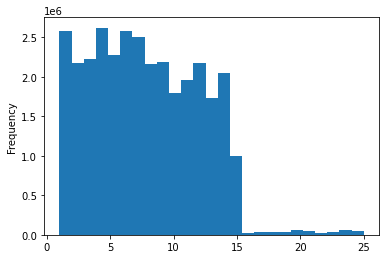

In [12]:
# Create a histogram for the prices column
prices_hist = ords_prods_cust['prices'].plot.hist(bins = 25)

# 04. Scatterplot

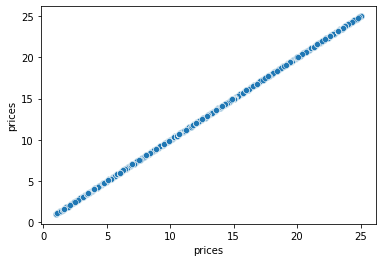

In [37]:
# Create a scatterplot for the prices column
prices_scat = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_cust)

# 05. Line chart

In [14]:
# Create a sample of random floating numbers between 0 and 1 with a 70/30 split
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [15]:
# Split the dataframe into two samples
big = ords_prods_cust[dev]
small = ords_prods_cust[~dev]

In [16]:
# Check the length of the dataframe
len(ords_prods_cust)

32404859

In [17]:
# Check that the split was successful
len(big) + len(small)

32404859

In [18]:
# Create a new dataframe to only contain the necessary columns 
df_small = small[['order_day_of_week', 'prices']]

In [19]:
df_small

,order_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5
...,...,...
32404841,2,10.7
32404842,6,10.7
32404843,0,10.7
32404849,1,10.7


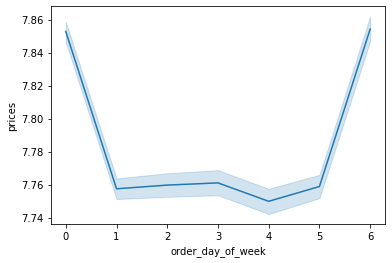

In [20]:
# Create the line chart for the df_small dataframe
line = sns.lineplot(data = df_small, x = 'order_day_of_week', y ='prices')

## Provide senior stakeholders with descriptive findings about sales

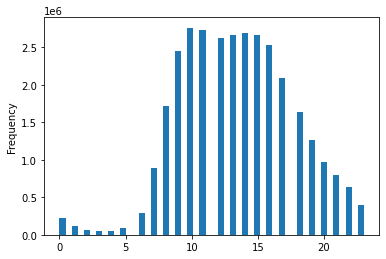

In [23]:
# Create a histogram of the order_hour_of_day column
order_hod_hist = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 50)

#### A histogram shows the density of a continuous variable--the distribution of observations per their occurrence in a data set. 

#### From the above histogram, most orders occur between 1000 and 1600 hours

## Distribution of orders among customers in terms of loyalty

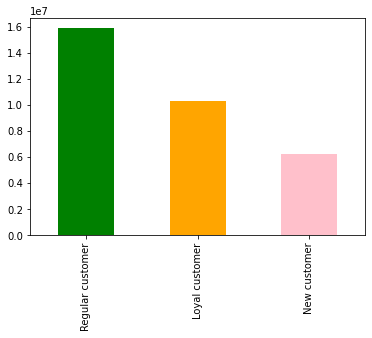

In [25]:
# Create a bar chart from the loyalty_flag column
loyalty_bar = ords_prods_cust['loyalty_flag'].value_counts().plot.bar(color = ['green', 'orange', 'pink'])

## Check whether there's a difference in expenditure (the prices column) depending on hour of day

In [26]:
# Create a new dataframe that contains the order_hour_of_day column and prices column
df_hod_price = small[['order_hour_of_day', 'prices']]

In [27]:
df_hod_price

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
32404841,12,10.7
32404842,3,10.7
32404843,1,10.7
32404849,18,10.7


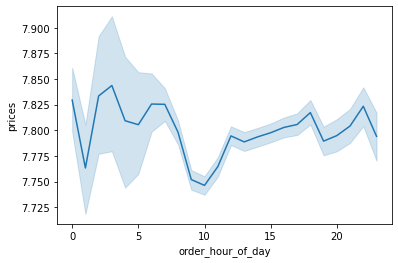

In [29]:
# Create a line chart for df_hod_price dataframe
line_hod_price = sns.lineplot(data = df_hod_price, x = 'order_hour_of_day', y = 'prices')

## Determine if there's a connection between age and family situation

In [30]:
# Create a new dataframe that contains the age and num_of_dependants column
df_age_fam = small[['age', 'num_of_dependants']]

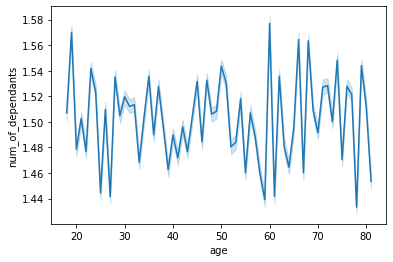

In [31]:
# Create a line chart exploring the connection between age and number of dependents  
line_age_fam = sns.lineplot(data = df_age_fam, x = 'age', y = 'num_of_dependants')

#### There is no clear connection between the customer's age and number of dependents in their family

## Determine if there's a connection between age and spending power (income)

In [32]:
# Create a new dataframe that contains the age and income column
df_age_income = small[['age', 'income']]

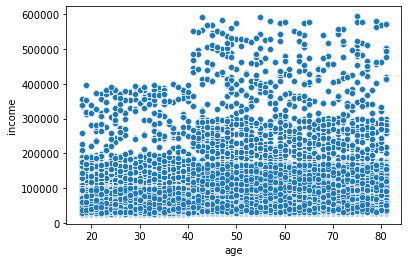

In [33]:
# Create a scatterplot to describe the relationship
scatter_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income )

#### From the above scatterplot, the range of income is extremely high.

#### 1. Those between the ages of 20 to 40 make up to 200,000 dollars.
#### 2. As the age increases, specifically past 40, the income ceiling increases too. Those over the age of 40 are making up to 600,000 dollars.
#### 3. This visualization shows that the older the customer is, the more they may be willing to spend (because of higher income).

## Export all visualizations as png files

In [34]:
order_dow_bar.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations', 'order_dow_bar.png'))

In [36]:
prices_hist.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations', 'prices_histogram.png'))

In [39]:
prices_scat.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations', 'prices_scatterplot.png'))

In [40]:
line.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations', 'order_dow_prices_line.png'))

In [41]:
order_hod_hist.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations','order_hod_histogram.png'))

In [42]:
loyalty_bar.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations','loyalty_flag_bar.png'))

In [43]:
line_hod_price.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations','hod_price_line.png'))

In [44]:
line_age_fam.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations','age_fam_line.png'))

In [45]:
scatter_age_income.figure.savefig(os.path.join (path, '04 Analysis', 'Visualizations','age_income_scatterplot.png'))

In [47]:
# Exporting file because of changes made
ords_prods_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_final_cleaned.pkl'))